# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [1]:
import dlib
import cv2
import numpy as np
import random
import math
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

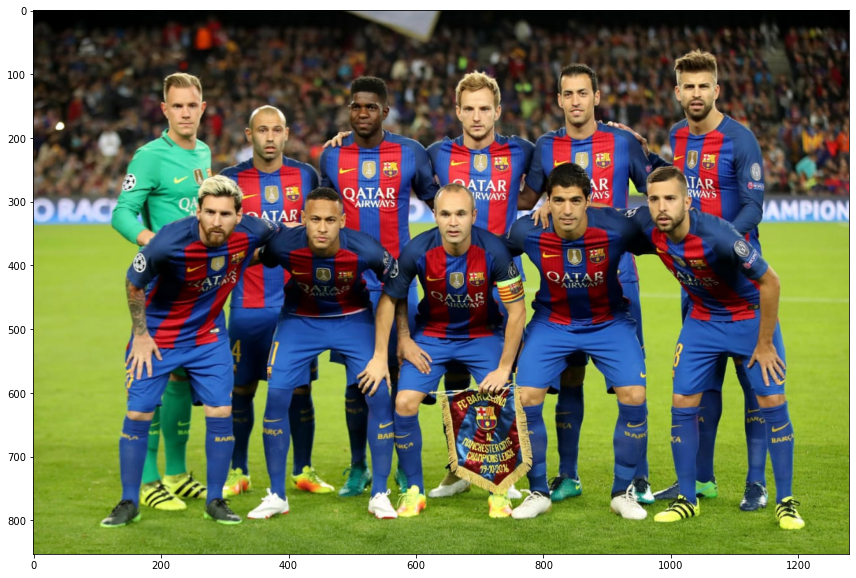

In [2]:
img = cv2.imread('../data/football.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

### Step 2

Load the dlib face predictor.

In [3]:
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [4]:
rects = detector(gray, 1)

### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

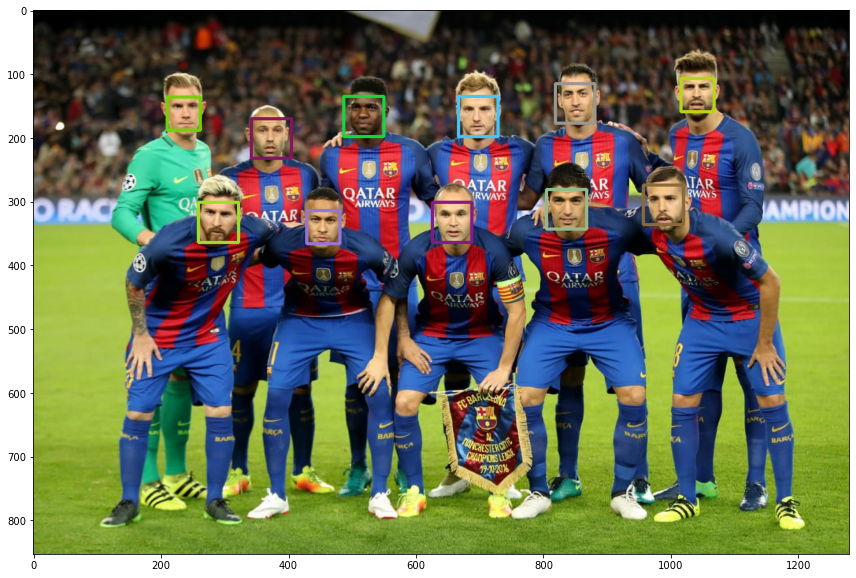

In [5]:
def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)

def random_color():
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return (r, g, b)

result = np.copy(img)
for rect in rects:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    cv2.rectangle(result, (x, y), (x+w, y+h), random_color(), 3)

plt.imshow(result)

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

In [6]:
def detect_faces(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Run detector
    rects = detector(gray, 2)
    
    result = np.copy(img)
    border_thickness = math.ceil(img.shape[0]*0.005)
    for rect in rects:    
        # Draw rectangle around the face
        x, y, w, h = rect_to_bb(rect)
        cv2.rectangle(result, (x, y), (x+w, y+h), (255, 0, 0), border_thickness)

    return result

In [7]:
def plot_images(images):
    '''Takes a list of images and plots them in two columns grid'''
    columns = 2
    rows = math.ceil(len(images) / columns)
    fig, axs = plt.subplots(rows, columns)
    fig.set_size_inches(columns * 10, rows * 8)
    for i in range(len(images)):
        row = i // columns
        col = i % columns
        image = images[i]
        axs[row, col].imshow(image)
    fig.tight_layout()

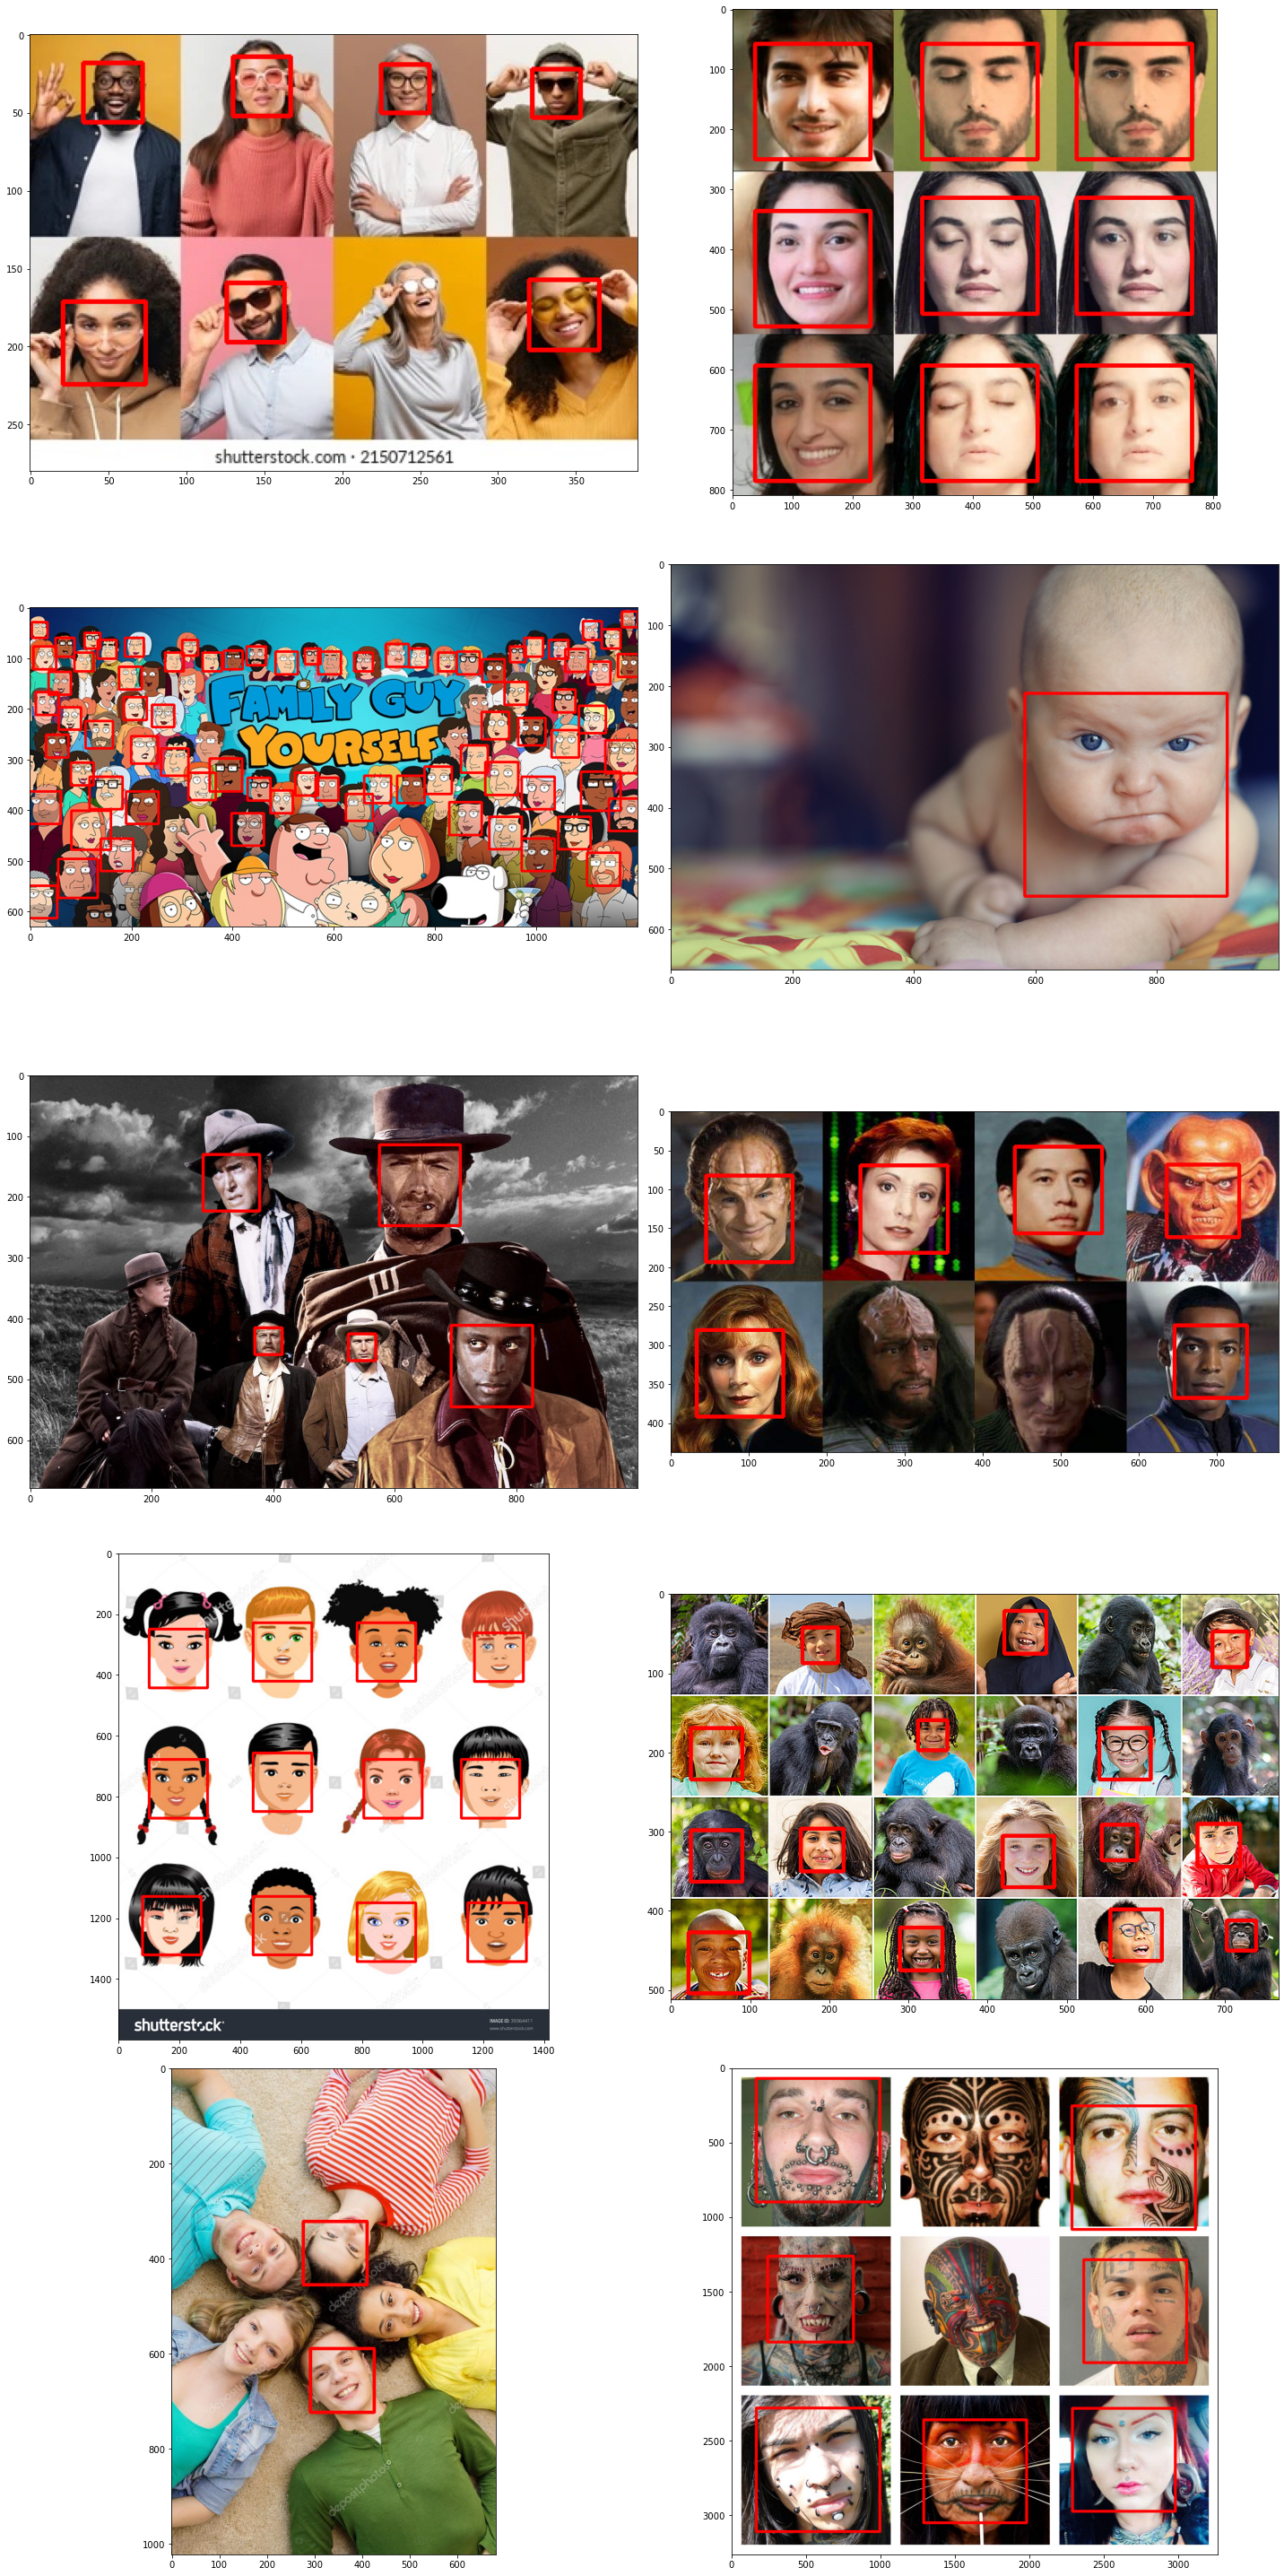

In [8]:
plot_images((
    detect_faces('../data/glasses.jpg'),
    detect_faces('../data/closed_eyes.jpg'),
    detect_faces('../data/cartoon.jpg'),
    detect_faces('../data/infant.jpg'),
    detect_faces('../data/cowboys.jpg'),
    detect_faces('../data/star_trek.jpg'),
    detect_faces('../data/drawn.jpg'),
    detect_faces('../data/monkeys.jpg'),
    detect_faces('../data/people_circle.jpg'),
    detect_faces('../data/body_modifications.jpg')
))